# ***Importing Requirements***

### Importing Libraries

In [0]:
from __future__ import print_function

import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import keras
import time
import mlflow
import mlflow.keras
import mlflow.tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


### Importing Data



In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: ignored

# ***Classifier***

In [0]:
df = pd.read_csv('Classifier.csv',sep=',')

### Maniplating and Pre-Processing Data

Performing One-Hot Encoding

In [0]:
df['ISleep'] = (df["Mode"] == 0)*1.0
df['IRead'] = (df["Mode"] == 1)*1.0
df['INormal'] = (df["Mode"] == 2)*1.0

df['OSleep'] = (df["Output"] == 0)*1.0
df['ORead'] = (df["Output"] == 1)*1.0
df['ONormal'] = (df["Output"] == 2)*1.0
df['Deactivate'] = (df["Output"] == -1)*1.0

print (df.describe())

               0-1          1-2          2-3          3-4          4-5  \
count  9072.000000  9072.000000  9072.000000  9072.000000  9072.000000   
mean      0.041667     0.041667     0.041667     0.041667     0.041667   
std       0.199837     0.199837     0.199837     0.199837     0.199837   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               5-6          6-7          7-8          8-9         9-10  ...  \
count  9072.000000  9072.000000  9072.000000  9072.000000  9072.000000  ...   
mean      0.041667     0.041667     0.041667     0.041667     0.041667  ...   
std       0.199837     0.199837     0.199837     0.199837     0.199837  ...   
min       0.00000

Setting Parameters

In [0]:
X = df[["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18","18-19","19-20","20-21","21-22","22-23","23-24","PIR","IRead","ISleep","INormal"]]
y = df[["OSleep", "ORead","ONormal","Deactivate"]]

### Creating and Evaluating Model

In [0]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(16, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 636
Trainable params: 636
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training Model

In [0]:
#expt_id = mlflow.create_experiment('Classifier')
mlflow.set_experiment('Classifier')

for v in [0.2, 0.33, 0.4]:
    for b in [200, 250 ,300]:
        for e in [10, 15, 20]:

            keras.backend.clear_session()
            model = Sequential()
            model.add(Dense(16, input_dim=28, activation='relu'))
            model.add(Dense(8, activation='relu'))
            model.add(Dense(4, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            results = model.fit(X, y, epochs=e, validation_split = v, batch_size = b)
                    
            with mlflow.start_run() as run:
                for i in range(e):

                    mlflow.log_param("Validation_Split", v)
                    mlflow.log_param("Batch_Size", b)
                    mlflow.log_param("Epochs", e)

                    mlflow.log_metric("Training_Loss", results.history['loss'][i])
                    mlflow.log_metric("Validation_Loss", results.history['val_loss'][i])
                    mlflow.log_metric("Training _Accuracy", results.history['accuracy'][i])
                    mlflow.log_metric("Validation_Accuracy", results.history['val_accuracy'][i])

Train on 7257 samples, validate on 1815 samples
Epoch 1/10
7257/7257 [==============================] - 0s 52us/step - loss: 1.3807 - accuracy: 0.3204 - val_loss: 1.3802 - val_accuracy: 0.2711
Epoch 2/10
7257/7257 [==============================] - 0s 25us/step - loss: 1.3003 - accuracy: 0.4775 - val_loss: 1.3458 - val_accuracy: 0.3405
Epoch 3/10
7257/7257 [==============================] - 0s 26us/step - loss: 1.1883 - accuracy: 0.6165 - val_loss: 1.3280 - val_accuracy: 0.3405
Epoch 4/10
7257/7257 [==============================] - 0s 27us/step - loss: 1.0249 - accuracy: 0.7229 - val_loss: 1.2954 - val_accuracy: 0.4099
Epoch 5/10
7257/7257 [==============================] - 0s 25us/step - loss: 0.8130 - accuracy: 0.8560 - val_loss: 1.0908 - val_accuracy: 0.4793
Epoch 6/10
7257/7257 [==============================] - 0s 25us/step - loss: 0.5813 - accuracy: 0.9055 - val_loss: 0.6637 - val_accuracy: 0.7917
Epoch 7/10
7257/7257 [==============================] - 0s 25us/step - loss: 0.394

### Predicting the Output

In [0]:
Prediction = model.predict(X)


Possible_Outputs = ["Sleep","Read","Normal","Deactivate"]

Predicted_class = np.argmax(Prediction,axis=-1)
print (Predicted_class)
print (Possible_Outputs[Predicted_class[9000]])

[0 0 0 ... 3 3 3]
Deactivate


# ***Intensity Predictor***


### Importing Data

In [0]:
sleep = pd.read_csv('Sleep.csv',sep=',')
read = pd.read_csv('Read.csv',sep=',')
normal = pd.read_csv('Normal.csv',sep=',')

### Visualising Data

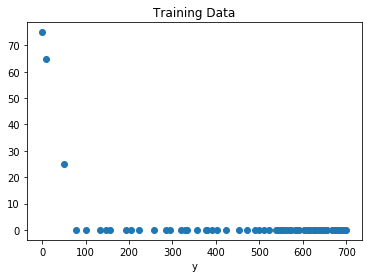

In [0]:
x_sleep = sleep["Intensity"]
y_sleep = sleep["Output"]

# Plot of Training Data 
plt.scatter(x_sleep, y_sleep) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

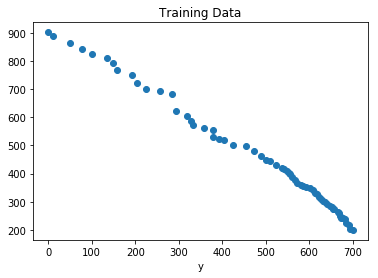

In [0]:
x_read = read["Intensity"]
y_read = read["Output"]

# Plot of Training Data 
plt.scatter(x_read, y_read) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

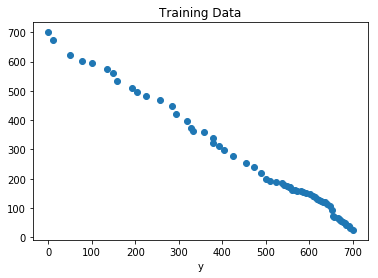

In [0]:
x_normal = normal["Intensity"]
y_normal = normal["Output"]

# Plot of Training Data 
plt.scatter(x_normal, y_normal) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

### Linear Regression

In [0]:
#expt_id = mlflow.create_experiment('Regressor')
mlflow.set_experiment('Regressor')

def Training(x,y,training_epochs,learning_rate,Initialise=False,m=0,c=0):
	
	if Initialise:
		q = float(y.max())
		p = -1.35 * float((y.max() - y.min())/(x.max() - x.min()))
	else:
		q = c * float(y.max())
		p = m * float((y.max() - y.min())/(x.max() - x.min()))


	W = tf.Variable(p) 
	b = tf.Variable(q)
	
	X = tf.placeholder("float")
	Y = tf.placeholder("float")

	n = len(x)
	# Hypothesis 
	y_pred = tf.add(tf.multiply(X, W), b)
	
	# Mean Squared Error Cost Function 
	cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

	optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 

	# Global Variables Initializer 
	init = tf.global_variables_initializer() 

	# Starting the Tensorflow Session Classifer
	with tf.Session() as sess: 
		# Initializing the Variables 
		sess.run(init) 
	
		# Iterating through all the epochs 
		for epoch in range(training_epochs): 
			
			# Feeding each data point into the optimizer using Feed Dictionary 
			for (_x, _y) in zip(x, y): 
				sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
			# Displaying the result after every 50 epochs 
			if (epoch + 1) % 50 == 0: 
				# Calculating the cost a every epoch 
				loss = sess.run(cost, feed_dict = {X : x, Y : y}) 
				print("Epoch", (epoch + 1), ": cost =", loss, "W =", sess.run(W), "b =", sess.run(b))

				if Initialise == False:
					with mlflow.start_run() as run:
						mlflow.log_param("Inital_Slope",m)
						mlflow.log_param("Inital_Intercept", c)
						mlflow.log_param("Learning_Rate",learning_rate)
		
						mlflow.log_metric("Cost", loss)
	

	
		# Storing necessary values to be used outside the Session 
		training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
		weight = sess.run(W) 
		bias = sess.run(b) 

	# Calculating the predictions 
	predictions = weight * x + bias 
	print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

	# Plotting the Results 
	plt.plot(x, y, 'ro', label ='Original data') 
	plt.plot(x, predictions, label ='Fitted line') 
	plt.title('Linear Regression Result') 
	plt.legend() 
	plt.show()

	return weight,bias
	

### Training Data

Training cost = 323.94086 Weight = -0.13223548 bias = 74.94812 



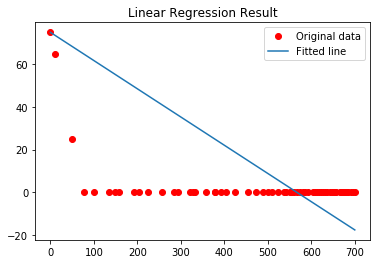

In [0]:
Weight_sleep,Bias_sleep =  Training(x_sleep,y_sleep,learning_rate = 0.0003,training_epochs = 10)

W1227 12:56:11.538179 140106605737792 deprecation.py:323] From /home/krishna/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1206: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 50 : cost = 194.0477 W = -0.93855643 b = 899.8579
Epoch 100 : cost = 192.87866 W = -0.9415486 b = 900.3332
Epoch 150 : cost = 192.97751 W = -0.9484575 b = 901.702
Epoch 200 : cost = 187.54852 W = -0.9516188 b = 903.3437
Epoch 250 : cost = 181.87448 W = -0.95420986 b = 904.9292
Epoch 300 : cost = 176.77193 W = -0.95668304 b = 906.45337
Training cost = 176.77193 Weight = -0.95668304 bias = 906.45337 



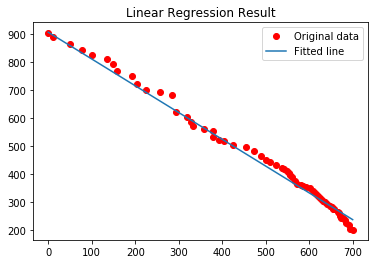

Amount of Time Taken: 23.98
Epoch 50 : cost = 193.89464 W = -0.9388384 b = 899.9004
Epoch 100 : cost = 193.21228 W = -0.9434596 b = 900.5583
Epoch 150 : cost = 196.7084 W = -0.95235664 b = 902.31525
Epoch 200 : cost = 190.1212 W = -0.9560225 b = 904.3066
Epoch 250 : cost = 183.26178 W = -0.95908237 b = 906.21484
Epoch 300 : cost = 177.24194 W = -0.96197367 b = 908.03064
Training cost = 177.24194 Weight = -0.96197367 bias = 908.03064 



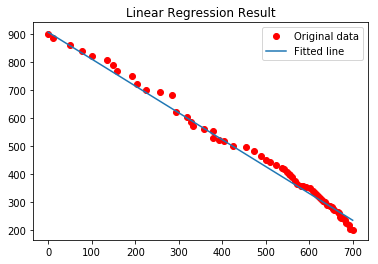

Amount of Time Taken: 23.41
Epoch 50 : cost = 193.74738 W = -0.93910056 b = 899.9435
Epoch 100 : cost = 194.82814 W = -0.9459608 b = 900.81116
Epoch 150 : cost = 203.9579 W = -0.9567994 b = 902.96747
Epoch 200 : cost = 196.17467 W = -0.96095425 b = 905.2976
Epoch 250 : cost = 188.00249 W = -0.96446127 b = 907.5246
Epoch 300 : cost = 180.97841 W = -0.96774226 b = 909.6242
Training cost = 180.97841 Weight = -0.96774226 bias = 909.6242 



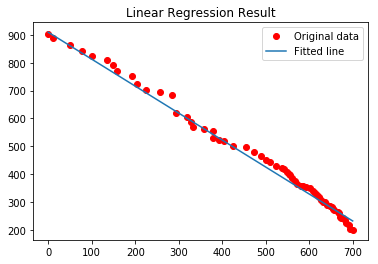

Amount of Time Taken: 22.96
Epoch 50 : cost = 460.54483 W = -1.0981656 b = 989.6214
Epoch 100 : cost = 457.97824 W = -1.0911808 b = 988.72076
Epoch 150 : cost = 452.8306 W = -1.0825229 b = 986.80096
Epoch 200 : cost = 432.88614 W = -1.079063 b = 984.7383
Epoch 250 : cost = 413.22397 W = -1.0759059 b = 982.7132
Epoch 300 : cost = 394.556 W = -1.0728136 b = 980.72375
Training cost = 394.556 Weight = -1.0728136 bias = 980.72375 



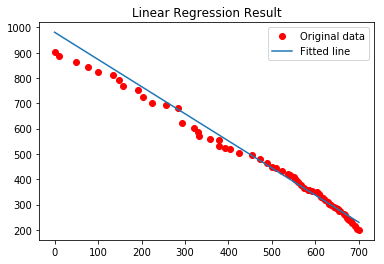

Amount of Time Taken: 23.42
Epoch 50 : cost = 460.139 W = -1.0976381 b = 989.5584
Epoch 100 : cost = 459.08987 W = -1.0884242 b = 988.3669
Epoch 150 : cost = 447.82178 W = -1.0807648 b = 986.0957
Epoch 200 : cost = 424.30334 W = -1.0771887 b = 983.7535
Epoch 250 : cost = 402.078 W = -1.073738 b = 981.4625
Epoch 300 : cost = 381.43323 W = -1.0704043 b = 979.24536
Training cost = 381.43323 Weight = -1.0704043 bias = 979.24536 



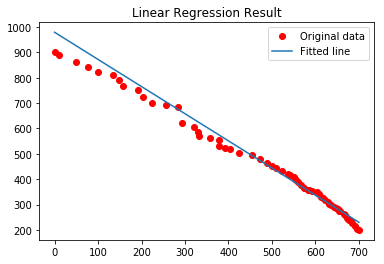

Amount of Time Taken: 23.00
Epoch 50 : cost = 459.89117 W = -1.0968353 b = 989.4878
Epoch 100 : cost = 460.45898 W = -1.0859039 b = 987.9969
Epoch 150 : cost = 440.5046 W = -1.0798943 b = 985.4263
Epoch 200 : cost = 414.3225 W = -1.0761969 b = 982.8519
Epoch 250 : cost = 390.2998 W = -1.0725658 b = 980.359
Epoch 300 : cost = 368.214 W = -1.0690694 b = 977.9555
Training cost = 368.214 Weight = -1.0690694 bias = 977.9555 



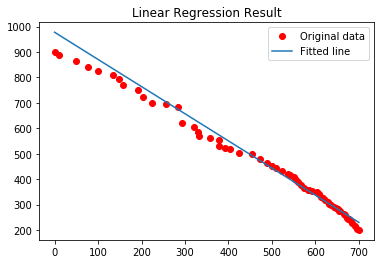

Amount of Time Taken: 23.18
Epoch 50 : cost = 1969.6063 W = -1.2580941 b = 1079.4634
Epoch 100 : cost = 1953.383 W = -1.2451017 b = 1077.821
Epoch 150 : cost = 1941.9624 W = -1.22974 b = 1075.1099
Epoch 200 : cost = 1882.4873 W = -1.223907 b = 1072.29
Epoch 250 : cost = 1818.3582 W = -1.2189467 b = 1069.4615
Epoch 300 : cost = 1755.9373 W = -1.2140824 b = 1066.6658
Training cost = 1755.9373 Weight = -1.2140824 bias = 1066.6658 



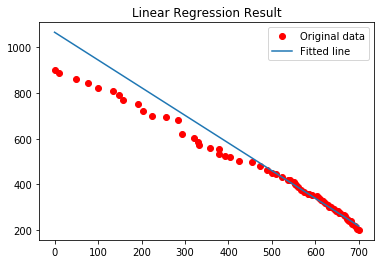

Amount of Time Taken: 23.14
Epoch 50 : cost = 1966.8713 W = -1.2571748 b = 1079.3196
Epoch 100 : cost = 1957.1223 W = -1.2394701 b = 1077.1868
Epoch 150 : cost = 1945.5471 W = -1.2231404 b = 1073.9266
Epoch 200 : cost = 1873.3828 W = -1.2167478 b = 1070.5981
Epoch 250 : cost = 1798.0692 W = -1.2110538 b = 1067.2809
Epoch 300 : cost = 1723.9956 W = -1.205389 b = 1063.9562
Training cost = 1723.9956 Weight = -1.205389 bias = 1063.9562 



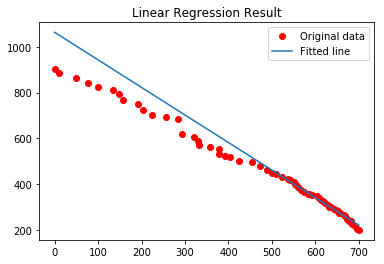

Amount of Time Taken: 23.13
Epoch 50 : cost = 1964.9475 W = -1.2555683 b = 1079.1665
Epoch 100 : cost = 1966.2787 W = -1.2337056 b = 1076.532
Epoch 150 : cost = 1949.8917 W = -1.2171042 b = 1072.7472
Epoch 200 : cost = 1863.8159 W = -1.2101405 b = 1068.8903
Epoch 250 : cost = 1776.5923 W = -1.2037505 b = 1065.0714
Epoch 300 : cost = 1691.5342 W = -1.1974304 b = 1061.2648
Training cost = 1691.5342 Weight = -1.1974304 bias = 1061.2648 



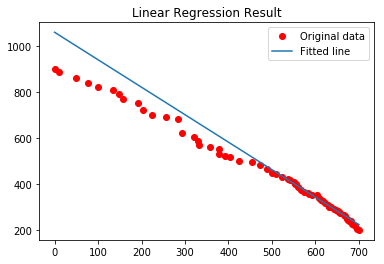

Amount of Time Taken: 23.34
Epoch 50 : cost = 186.46683 W = -0.95152557 b = 903.483
Epoch 100 : cost = 181.44714 W = -0.95439684 b = 905.04895
Epoch 150 : cost = 176.39934 W = -0.95687056 b = 906.5691
Epoch 200 : cost = 171.89542 W = -0.9592279 b = 908.02515
Epoch 250 : cost = 167.89577 W = -0.96148175 b = 909.42017
Epoch 300 : cost = 164.37448 W = -0.9636252 b = 910.7492
Training cost = 164.37448 Weight = -0.9636252 bias = 910.7492 



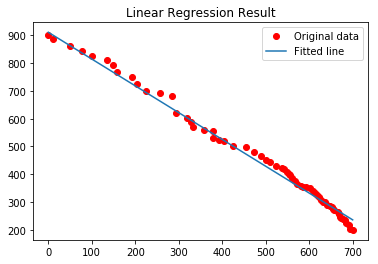

Amount of Time Taken: 23.61
Epoch 50 : cost = 191.2113 W = -0.9549596 b = 903.8261
Epoch 100 : cost = 184.88322 W = -0.9583283 b = 905.7464
Epoch 150 : cost = 178.6749 W = -0.9612628 b = 907.58374
Epoch 200 : cost = 173.25443 W = -0.9640381 b = 909.33057
Epoch 250 : cost = 168.55896 W = -0.96666527 b = 910.9891
Epoch 300 : cost = 164.5176 W = -0.9691483 b = 912.56067
Training cost = 164.5176 Weight = -0.9691483 bias = 912.56067 



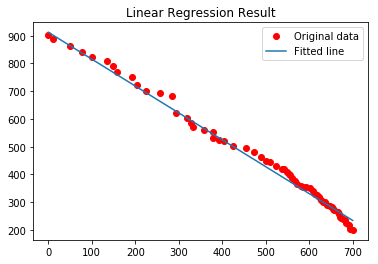

Amount of Time Taken: 23.66
Epoch 50 : cost = 199.60924 W = -0.9589397 b = 904.1931
Epoch 100 : cost = 191.76628 W = -0.9628043 b = 906.47174
Epoch 150 : cost = 184.21826 W = -0.9661899 b = 908.6297
Epoch 200 : cost = 177.75069 W = -0.96936655 b = 910.66693
Epoch 250 : cost = 172.2703 W = -0.9723446 b = 912.58435
Epoch 300 : cost = 167.6673 W = -0.9751284 b = 914.38336
Training cost = 167.6673 Weight = -0.9751284 bias = 914.38336 



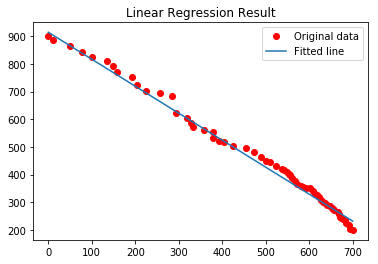

Amount of Time Taken: 23.51
Epoch 50 : cost = 489.85187 W = -1.0877053 b = 990.25696
Epoch 100 : cost = 467.2271 W = -1.0843363 b = 988.1178
Epoch 150 : cost = 445.69653 W = -1.0810584 b = 986.0199
Epoch 200 : cost = 425.3198 W = -1.0778573 b = 983.96655
Epoch 250 : cost = 406.0119 W = -1.0747236 b = 981.9529
Epoch 300 : cost = 387.81018 W = -1.0716692 b = 979.98694
Training cost = 387.81018 Weight = -1.0716692 bias = 979.98694 



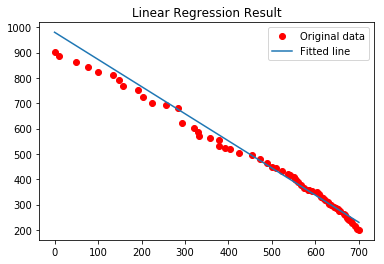

Amount of Time Taken: 23.68
Epoch 50 : cost = 488.60477 W = -1.086518 b = 989.9217
Epoch 100 : cost = 462.30814 W = -1.082805 b = 987.4728
Epoch 150 : cost = 437.73035 W = -1.0792106 b = 985.0941
Epoch 200 : cost = 414.6683 W = -1.0757091 b = 982.7717
Epoch 250 : cost = 393.12726 W = -1.072309 b = 980.5125
Epoch 300 : cost = 373.08316 W = -1.0690168 b = 978.32153
Training cost = 373.08316 Weight = -1.0690168 bias = 978.32153 



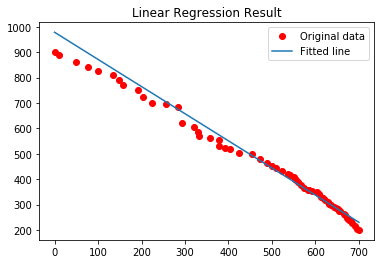

Amount of Time Taken: 24.63
Epoch 50 : cost = 485.3033 W = -1.0861068 b = 989.6299
Epoch 100 : cost = 455.96048 W = -1.0821444 b = 986.92303
Epoch 150 : cost = 428.75653 W = -1.0783058 b = 984.29675
Epoch 200 : cost = 403.59836 W = -1.074597 b = 981.75366
Epoch 250 : cost = 380.45303 W = -1.0710269 b = 979.3016
Epoch 300 : cost = 359.1315 W = -1.0675819 b = 976.9321
Training cost = 359.1315 Weight = -1.0675819 bias = 976.9321 



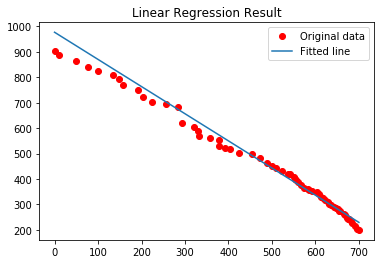

Amount of Time Taken: 23.28
Epoch 50 : cost = 2054.8115 W = -1.2367074 b = 1079.6208
Epoch 100 : cost = 1987.3201 W = -1.2317393 b = 1076.7864
Epoch 150 : cost = 1921.293 W = -1.2268009 b = 1073.964
Epoch 200 : cost = 1856.2595 W = -1.2218614 b = 1071.1344
Epoch 250 : cost = 1792.6898 W = -1.2169548 b = 1068.3179
Epoch 300 : cost = 1730.9163 W = -1.2121122 b = 1065.5309
Training cost = 1730.9163 Weight = -1.2121122 bias = 1065.5309 



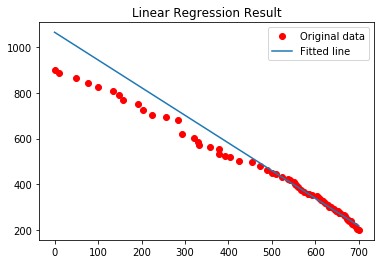

Amount of Time Taken: 22.29
Epoch 50 : cost = 2073.8848 W = -1.2313583 b = 1079.0945
Epoch 100 : cost = 1993.184 W = -1.2255416 b = 1075.7246
Epoch 150 : cost = 1914.6517 W = -1.2197822 b = 1072.3779
Epoch 200 : cost = 1838.2361 W = -1.2140852 b = 1069.0549
Epoch 250 : cost = 1763.3906 W = -1.208413 b = 1065.7329
Epoch 300 : cost = 1690.1329 W = -1.2027664 b = 1062.4125
Training cost = 1690.1329 Weight = -1.2027664 bias = 1062.4125 



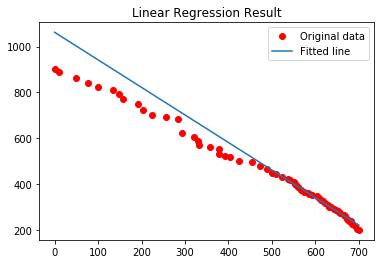

Amount of Time Taken: 22.76
Epoch 50 : cost = 2094.7046 W = -1.2264802 b = 1078.5885
Epoch 100 : cost = 2000.8566 W = -1.2199183 b = 1074.7107
Epoch 150 : cost = 1909.2838 W = -1.2134001 b = 1070.8406
Epoch 200 : cost = 1820.6139 W = -1.2069782 b = 1067.0072
Epoch 250 : cost = 1734.4144 W = -1.2006297 b = 1063.1948
Epoch 300 : cost = 1650.5801 W = -1.1943479 b = 1059.3995
Training cost = 1650.5801 Weight = -1.1943479 bias = 1059.3995 



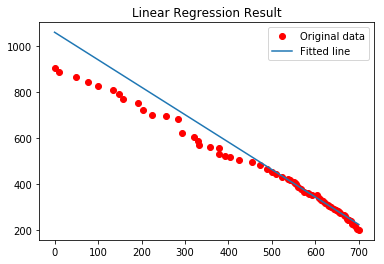

Amount of Time Taken: 21.89
Epoch 50 : cost = 185.85455 W = -0.9506772 b = 903.3598
Epoch 100 : cost = 181.91084 W = -0.95414513 b = 904.9055
Epoch 150 : cost = 176.8468 W = -0.95664436 b = 906.4299
Epoch 200 : cost = 172.29352 W = -0.9590124 b = 907.8919
Epoch 250 : cost = 168.24756 W = -0.9612766 b = 909.293
Epoch 300 : cost = 164.68484 W = -0.96342945 b = 910.6277
Training cost = 164.68484 Weight = -0.96342945 bias = 910.6277 



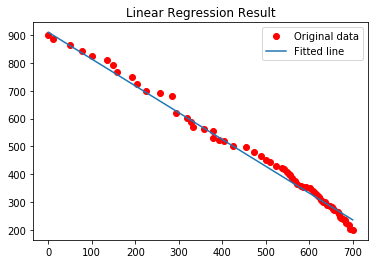

Amount of Time Taken: 22.86
Epoch 50 : cost = 190.23886 W = -0.9540388 b = 903.6664
Epoch 100 : cost = 185.45448 W = -0.9580345 b = 905.5733
Epoch 150 : cost = 179.21109 W = -0.96099997 b = 907.41876
Epoch 200 : cost = 173.71756 W = -0.9637909 b = 909.17487
Epoch 250 : cost = 168.9599 W = -0.9664313 b = 910.8412
Epoch 300 : cost = 164.86172 W = -0.9689271 b = 912.42053
Training cost = 164.86172 Weight = -0.9689271 bias = 912.42053 



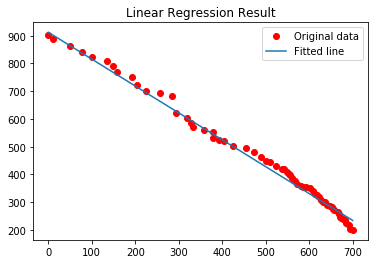

Amount of Time Taken: 22.62
Epoch 50 : cost = 198.21092 W = -0.95796734 b = 904.00055
Epoch 100 : cost = 192.43584 W = -0.9624774 b = 906.2747
Epoch 150 : cost = 184.8398 W = -0.96589905 b = 908.44385
Epoch 200 : cost = 178.28232 W = -0.969093 b = 910.4912
Epoch 250 : cost = 172.7193 W = -0.9720886 b = 912.4192
Epoch 300 : cost = 168.04521 W = -0.97488797 b = 914.22766
Training cost = 168.04521 Weight = -0.97488797 bias = 914.22766 



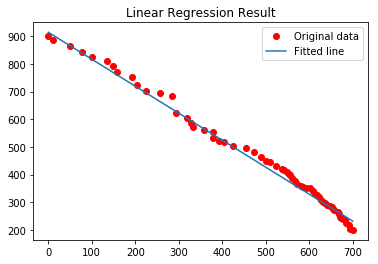

Amount of Time Taken: 22.21
Epoch 50 : cost = 491.93826 W = -1.0881441 b = 990.4794
Epoch 100 : cost = 469.50916 W = -1.0846797 b = 988.33655
Epoch 150 : cost = 447.8679 W = -1.0813936 b = 986.2347
Epoch 200 : cost = 427.37653 W = -1.0781847 b = 984.17694
Epoch 250 : cost = 407.9614 W = -1.0750443 b = 982.1593
Epoch 300 : cost = 389.6382 W = -1.0719807 b = 980.18756
Training cost = 389.6382 Weight = -1.0719807 bias = 980.18756 



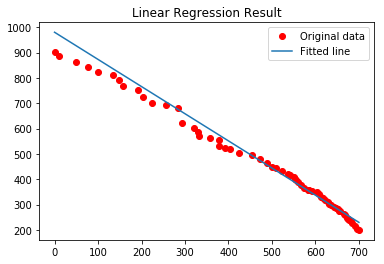

Amount of Time Taken: 23.10
Epoch 50 : cost = 490.81656 W = -1.0868584 b = 990.131
Epoch 100 : cost = 464.48364 W = -1.0831174 b = 987.679
Epoch 150 : cost = 439.76633 W = -1.0795139 b = 985.29486
Epoch 200 : cost = 416.58603 W = -1.0760051 b = 982.9684
Epoch 250 : cost = 394.89392 W = -1.072593 b = 980.70135
Epoch 300 : cost = 374.7336 W = -1.0692929 b = 978.50543
Training cost = 374.7336 Weight = -1.0692929 bias = 978.50543 



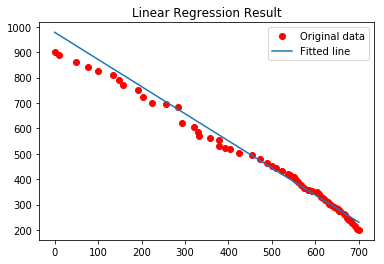

Amount of Time Taken: 22.96
Epoch 50 : cost = 487.43436 W = -1.0863729 b = 989.8185
Epoch 100 : cost = 457.93414 W = -1.0824162 b = 987.10895
Epoch 150 : cost = 430.58185 W = -1.078569 b = 984.47687
Epoch 200 : cost = 405.28333 W = -1.0748508 b = 981.9278
Epoch 250 : cost = 381.9969 W = -1.0712701 b = 979.4688
Epoch 300 : cost = 360.5634 W = -1.0678184 b = 977.0949
Training cost = 360.5634 Weight = -1.0678184 bias = 977.0949 



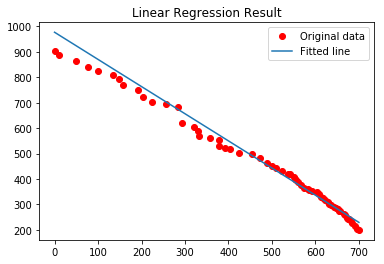

Amount of Time Taken: 23.39
Epoch 50 : cost = 2056.4539 W = -1.2369528 b = 1079.7124
Epoch 100 : cost = 1989.4481 W = -1.2319008 b = 1076.8772
Epoch 150 : cost = 1923.4021 W = -1.22696 b = 1074.0549
Epoch 200 : cost = 1858.3387 W = -1.2220207 b = 1071.2257
Epoch 250 : cost = 1794.7173 W = -1.2171123 b = 1068.4084
Epoch 300 : cost = 1732.8898 W = -1.2122681 b = 1065.6207
Training cost = 1732.8898 Weight = -1.2122681 bias = 1065.6207 



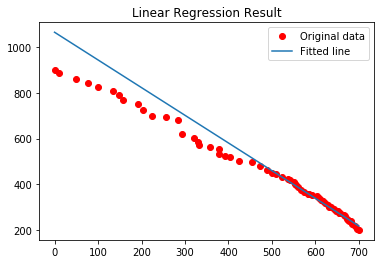

Amount of Time Taken: 22.90
Epoch 50 : cost = 2075.6484 W = -1.2315958 b = 1079.1903
Epoch 100 : cost = 1995.4156 W = -1.2257073 b = 1075.8195
Epoch 150 : cost = 1916.8408 W = -1.2199442 b = 1072.4722
Epoch 200 : cost = 1840.3794 W = -1.2142463 b = 1069.149
Epoch 250 : cost = 1765.4917 W = -1.2085737 b = 1065.8271
Epoch 300 : cost = 1692.1893 W = -1.2029265 b = 1062.5067
Training cost = 1692.1893 Weight = -1.2029265 bias = 1062.5067 



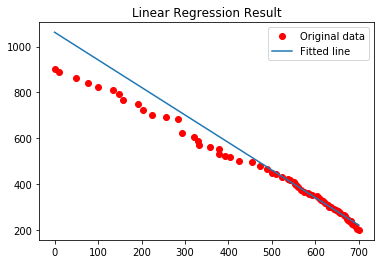

Amount of Time Taken: 22.51
Epoch 50 : cost = 2096.3665 W = -1.226689 b = 1078.6772
Epoch 100 : cost = 2002.9446 W = -1.220068 b = 1074.7985
Epoch 150 : cost = 1911.3281 W = -1.2135465 b = 1070.9279
Epoch 200 : cost = 1822.5846 W = -1.2071223 b = 1067.0934
Epoch 250 : cost = 1736.334 W = -1.2007726 b = 1063.2808
Epoch 300 : cost = 1652.436 W = -1.1944885 b = 1059.4846
Training cost = 1652.436 Weight = -1.1944885 bias = 1059.4846 



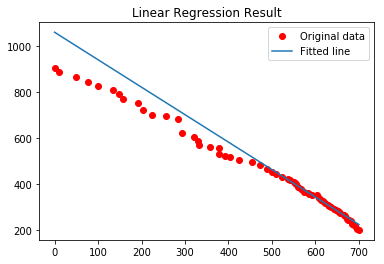

Amount of Time Taken: 22.97
Epoch 50 : cost = 184.78575 W = -0.94957596 b = 903.27386
Epoch 100 : cost = 182.25473 W = -0.9539167 b = 904.78796
Epoch 150 : cost = 177.21832 W = -0.9564567 b = 906.3147
Epoch 200 : cost = 172.6231 W = -0.958835 b = 907.7823
Epoch 250 : cost = 168.54031 W = -0.9611068 b = 909.18787
Epoch 300 : cost = 164.94289 W = -0.9632678 b = 910.52734
Training cost = 164.94289 Weight = -0.9632678 bias = 910.52734 



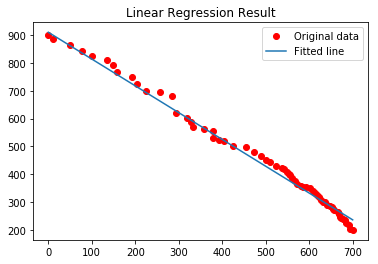

Amount of Time Taken: 23.05
Epoch 50 : cost = 188.3751 W = -0.95274454 b = 903.5383
Epoch 100 : cost = 185.9318 W = -0.95774645 b = 905.4152
Epoch 150 : cost = 179.70302 W = -0.9607593 b = 907.2681
Epoch 200 : cost = 174.1457 W = -0.9635648 b = 909.0323
Epoch 250 : cost = 169.32777 W = -0.9662181 b = 910.7065
Epoch 300 : cost = 165.1782 W = -0.96872526 b = 912.2927
Training cost = 165.1782 Weight = -0.96872526 bias = 912.2927 



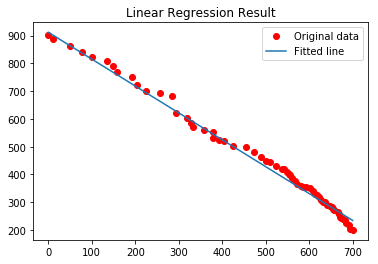

Amount of Time Taken: 22.85
Epoch 50 : cost = 195.37259 W = -0.9565463 b = 903.8347
Epoch 100 : cost = 193.01576 W = -0.96214765 b = 906.08746
Epoch 150 : cost = 185.43549 W = -0.96562135 b = 908.2668
Epoch 200 : cost = 178.79074 W = -0.9688336 b = 910.32465
Epoch 250 : cost = 173.14972 W = -0.97184473 b = 912.2621
Epoch 300 : cost = 168.4075 W = -0.9746594 b = 914.0798
Training cost = 168.4075 Weight = -0.9746594 bias = 914.0798 



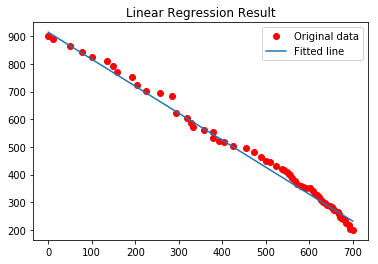

Amount of Time Taken: 23.86
Epoch 50 : cost = 494.01 W = -1.0888785 b = 990.7632
Epoch 100 : cost = 472.47217 W = -1.085128 b = 988.6203
Epoch 150 : cost = 450.69922 W = -1.0818293 b = 986.5137
Epoch 200 : cost = 430.05988 W = -1.0786109 b = 984.45044
Epoch 250 : cost = 410.51608 W = -1.075464 b = 982.42896
Epoch 300 : cost = 392.02383 W = -1.0723859 b = 980.44836
Training cost = 392.02383 Weight = -1.0723859 bias = 980.44836 



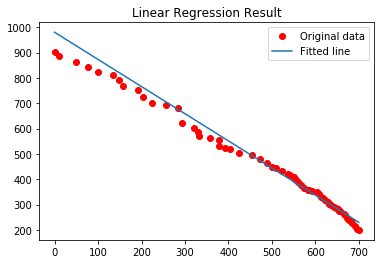

Amount of Time Taken: 22.37
Epoch 50 : cost = 493.45676 W = -1.0873544 b = 990.4001
Epoch 100 : cost = 467.31647 W = -1.0835228 b = 987.9466
Epoch 150 : cost = 442.42245 W = -1.0799073 b = 985.55554
Epoch 200 : cost = 419.079 W = -1.0763898 b = 983.2233
Epoch 250 : cost = 397.19858 W = -1.072962 b = 980.9467
Epoch 300 : cost = 376.893 W = -1.0696533 b = 978.7452
Training cost = 376.893 Weight = -1.0696533 bias = 978.7452 



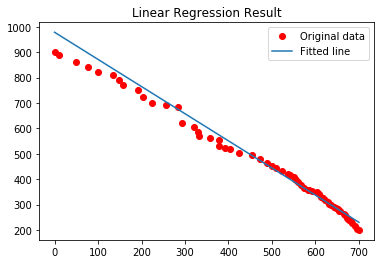

Amount of Time Taken: 22.65
Epoch 50 : cost = 490.347 W = -1.0867163 b = 990.0711
Epoch 100 : cost = 460.5567 W = -1.0827758 b = 987.35504
Epoch 150 : cost = 433.00858 W = -1.0789173 b = 984.71533
Epoch 200 : cost = 407.53018 W = -1.0751876 b = 982.159
Epoch 250 : cost = 384.05972 W = -1.071594 b = 979.6914
Epoch 300 : cost = 362.47324 W = -1.0681326 b = 977.31116
Training cost = 362.47324 Weight = -1.0681326 bias = 977.31116 



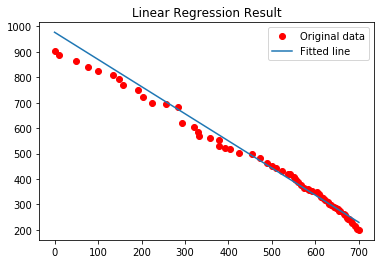

Amount of Time Taken: 23.83
Epoch 50 : cost = 2058.5076 W = -1.2374815 b = 1079.8676
Epoch 100 : cost = 1993.139 W = -1.2321863 b = 1077.0356
Epoch 150 : cost = 1927.0782 W = -1.2272372 b = 1074.2134
Epoch 200 : cost = 1861.9633 W = -1.2222979 b = 1071.3846
Epoch 250 : cost = 1798.2345 W = -1.2173858 b = 1068.5656
Epoch 300 : cost = 1736.3234 W = -1.212539 b = 1065.7769
Training cost = 1736.3234 Weight = -1.212539 bias = 1065.7769 



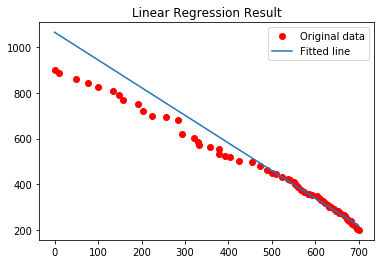

Amount of Time Taken: 25.87
Epoch 50 : cost = 2077.6353 W = -1.2320564 b = 1079.3378
Epoch 100 : cost = 1998.849 W = -1.2259654 b = 1075.966
Epoch 150 : cost = 1920.213 W = -1.220194 b = 1072.6173
Epoch 200 : cost = 1843.6702 W = -1.2144934 b = 1069.2935
Epoch 250 : cost = 1768.7201 W = -1.2088202 b = 1065.9718
Epoch 300 : cost = 1695.3362 W = -1.2031711 b = 1062.6508
Training cost = 1695.3362 Weight = -1.2031711 bias = 1062.6508 



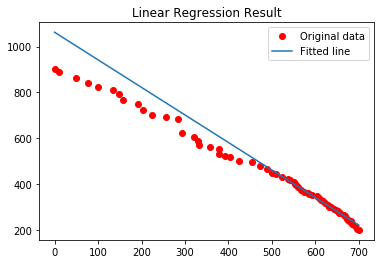

Amount of Time Taken: 27.02
Epoch 50 : cost = 2098.4707 W = -1.2270868 b = 1078.8192
Epoch 100 : cost = 2006.3258 W = -1.2203126 b = 1074.941
Epoch 150 : cost = 1914.6476 W = -1.2137856 b = 1071.0698
Epoch 200 : cost = 1825.8137 W = -1.2073576 b = 1067.2344
Epoch 250 : cost = 1739.4938 W = -1.2010067 b = 1063.4219
Epoch 300 : cost = 1655.4852 W = -1.1947187 b = 1059.6241
Training cost = 1655.4852 Weight = -1.1947187 bias = 1059.6241 



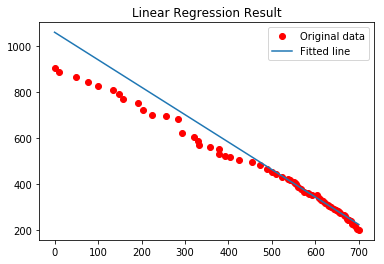

Amount of Time Taken: 26.70
Epoch 50 : cost = 183.68013 W = -0.9483708 b = 903.2187
Epoch 100 : cost = 182.53706 W = -0.95365965 b = 904.67267
Epoch 150 : cost = 177.58656 W = -0.9562704 b = 906.2008
Epoch 200 : cost = 172.95099 W = -0.95865965 b = 907.6739
Epoch 250 : cost = 168.83118 W = -0.96093893 b = 909.084
Epoch 300 : cost = 165.19914 W = -0.9631081 b = 910.4283
Training cost = 165.19914 Weight = -0.9631081 bias = 910.4283 



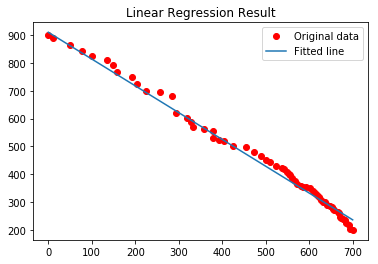

Amount of Time Taken: 25.94
Epoch 50 : cost = 186.11168 W = -0.9511411 b = 903.4373
Epoch 100 : cost = 186.32393 W = -0.95743155 b = 905.2603
Epoch 150 : cost = 180.19098 W = -0.9605205 b = 907.1192
Epoch 200 : cost = 174.57378 W = -0.96333975 b = 908.89056
Epoch 250 : cost = 169.69646 W = -0.9660064 b = 910.5727
Epoch 300 : cost = 165.49463 W = -0.9685255 b = 912.16614
Training cost = 165.49463 Weight = -0.9685255 bias = 912.16614 



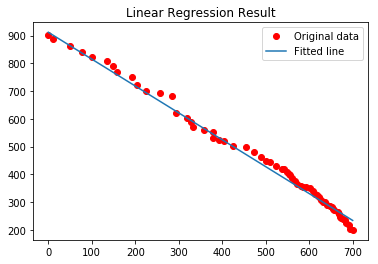

Amount of Time Taken: 26.53
Epoch 50 : cost = 191.4483 W = -0.9546174 b = 903.6874
Epoch 100 : cost = 193.51892 W = -0.9617749 b = 905.8936
Epoch 150 : cost = 186.05782 W = -0.9653318 b = 908.0827
Epoch 200 : cost = 179.32379 W = -0.968564 b = 910.15155
Epoch 250 : cost = 173.59952 W = -0.9715928 b = 912.0997
Epoch 300 : cost = 168.78548 W = -0.9744235 b = 913.9271
Training cost = 168.78548 Weight = -0.9744235 bias = 913.9271 



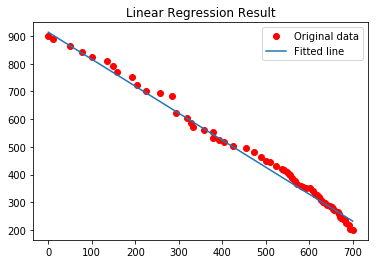

Amount of Time Taken: 25.72
Epoch 50 : cost = 495.1606 W = -1.0900244 b = 991.0732
Epoch 100 : cost = 475.76282 W = -1.0856326 b = 988.9359
Epoch 150 : cost = 453.84485 W = -1.0823114 b = 986.8222
Epoch 200 : cost = 433.03238 W = -1.0790808 b = 984.75195
Epoch 250 : cost = 413.35007 W = -1.0759267 b = 982.72644
Epoch 300 : cost = 394.6747 W = -1.0728334 b = 980.7366
Training cost = 394.6747 Weight = -1.0728334 bias = 980.7366 



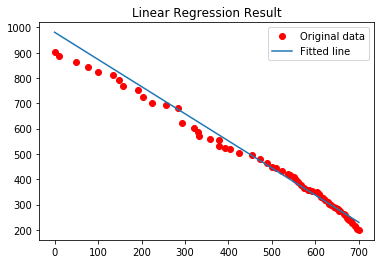

Amount of Time Taken: 26.43
Epoch 50 : cost = 495.9233 W = -1.0880969 b = 990.71204
Epoch 100 : cost = 470.63074 W = -1.0839975 b = 988.2587
Epoch 150 : cost = 445.52594 W = -1.0803654 b = 985.8588
Epoch 200 : cost = 421.98587 W = -1.0768347 b = 983.5188
Epoch 250 : cost = 399.9012 W = -1.0733927 b = 981.23303
Epoch 300 : cost = 379.41595 W = -1.0700716 b = 979.02374
Training cost = 379.41595 Weight = -1.0700716 bias = 979.02374 



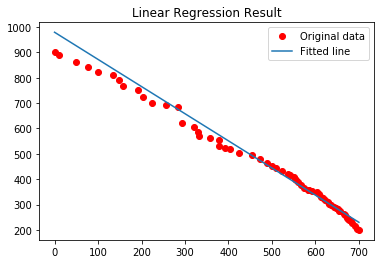

Amount of Time Taken: 25.84
Epoch 50 : cost = 493.75803 W = -1.0871402 b = 990.3708
Epoch 100 : cost = 463.7192 W = -1.0832057 b = 987.65
Epoch 150 : cost = 435.94122 W = -1.079336 b = 985.00214
Epoch 200 : cost = 410.24512 W = -1.0755932 b = 982.4372
Epoch 250 : cost = 386.54846 W = -1.0719835 b = 979.9588
Epoch 300 : cost = 364.76706 W = -1.0685084 b = 977.56964
Training cost = 364.76706 Weight = -1.0685084 bias = 977.56964 



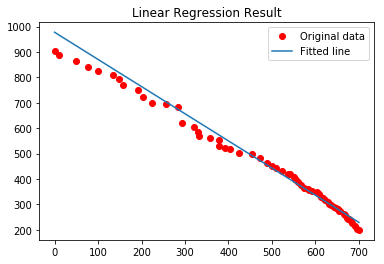

Amount of Time Taken: 25.91
Epoch 50 : cost = 2059.9067 W = -1.2383896 b = 1080.0724
Epoch 100 : cost = 1997.8606 W = -1.2325621 b = 1077.2401
Epoch 150 : cost = 1931.8173 W = -1.2275946 b = 1074.4175
Epoch 200 : cost = 1866.6268 W = -1.2226545 b = 1071.589
Epoch 250 : cost = 1802.7584 W = -1.2177368 b = 1068.7673
Epoch 300 : cost = 1740.7382 W = -1.2128872 b = 1065.9774
Training cost = 1740.7382 Weight = -1.2128872 bias = 1065.9774 



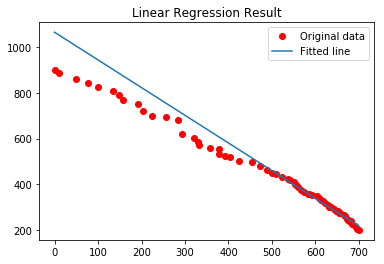

Amount of Time Taken: 27.58
Epoch 50 : cost = 2079.1667 W = -1.2328504 b = 1079.5404
Epoch 100 : cost = 2003.5652 W = -1.2263274 b = 1076.1686
Epoch 150 : cost = 1924.8864 W = -1.2205397 b = 1072.8182
Epoch 200 : cost = 1848.2217 W = -1.2148352 b = 1069.493
Epoch 250 : cost = 1773.1932 W = -1.2091615 b = 1066.172
Epoch 300 : cost = 1699.7029 W = -1.2035099 b = 1062.8503
Training cost = 1699.7029 Weight = -1.2035099 bias = 1062.8503 



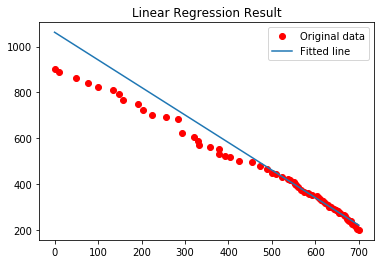

Amount of Time Taken: 27.36
Epoch 50 : cost = 2100.2246 W = -1.2277575 b = 1079.0123
Epoch 100 : cost = 2010.9153 W = -1.2206506 b = 1075.1357
Epoch 150 : cost = 1919.1996 W = -1.214112 b = 1071.264
Epoch 200 : cost = 1830.2219 W = -1.2076792 b = 1067.4268
Epoch 250 : cost = 1743.7987 W = -1.201326 b = 1063.6141
Epoch 300 : cost = 1659.6561 W = -1.1950334 b = 1059.8148
Training cost = 1659.6561 Weight = -1.1950334 bias = 1059.8148 



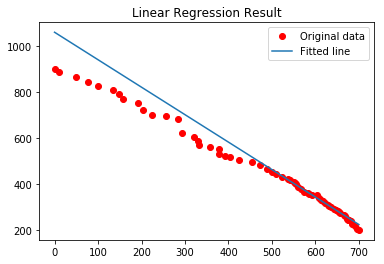

Amount of Time Taken: 27.38


In [0]:
for i in [1.15, -1.25, -1.35, -1.45, -1.55]:
    for j in [1, 1.1, 1.2]:
        for lr in [0.0025, 0.003, 0.0035]:
                        
            start = time.time()
            Weight_read,Bias_read =  Training(x_read,y_read,learning_rate = lr,training_epochs = 300,Initialise=False,m=i,c=j)
            end = time.time()
            print('Amount of Time Taken: %.2f' % (end-start))

Epoch 50 : cost = 121.87733 W = -0.93595266 b = 699.5918
Epoch 100 : cost = 119.64817 W = -0.9344097 b = 698.6926
Epoch 150 : cost = 116.99798 W = -0.933221 b = 697.8767
Epoch 200 : cost = 114.651436 W = -0.9321326 b = 697.12616
Epoch 250 : cost = 112.59145 W = -0.93113863 b = 696.43964
Epoch 300 : cost = 110.767075 W = -0.93022376 b = 695.80695
Training cost = 110.767075 Weight = -0.93022376 bias = 695.80695 



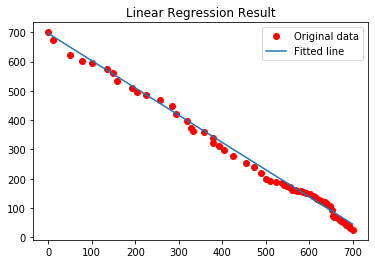

Amount of Time Taken: 24.40


In [0]:
start = time.time()
Weight_normal,Bias_normal =  Training(x_normal,y_normal,learning_rate = 0.003,training_epochs = 300)
end = time.time()
print('Amount of Time Taken: %.2f' % (end-start))